In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from utils.data_utils import get_data

# set default size of plots
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2


## Plot the loss, training and validation accuracy 

During training sessions, training and validation accuracy is saved for the whole sets at the end of each epoch. Accuracy calculation is done globally, i.e. for semantic segmentation, global_accuracy = correctly_labelled_pixels / all_labelled_pixels, and for scene classification; global_accuracy = correctly_classified_scenes / all_scenes.

[INFO] Checkpoint loaded: ./checkpoints/experiment/sun/best_model.pth.tarh.tar   
[83.8296808013916, 61.55135514177595, 59.26014118739537, 58.947748376028876, 58.77879702104841, 58.55320642852783, 58.38754701777867, 58.24681435939244, 58.11564976501465, 57.981635540553505, 57.81984236254011, 57.71530049133301, 57.58932013157436, 57.508271859305246, 57.42627718353271, 57.34756223188128, 57.232557935442244, 57.15228385053362, 57.12284436907087, 57.02225996943883, 56.89986681038993, 56.841971257890975, 56.784975449698315, 56.69366856384277, 56.69739948599679, 56.6009999193464, 56.57493826729911, 56.488128093174524, 56.43110441480364, 56.427412055969235, 56.33290676334926, 56.28249858420236, 56.284385030473985, 56.25124656677246, 55.941241436549596, 55.87923394121442, 55.86754246412005, 55.87161551448277, 55.80156185041155, 55.759421358381, 55.760163390023365, 55.80455338178362, 55.75788427952358, 55.75637586757115, 55.697305242265976, 55.77075848824637, 55.7634650780814, 55.72917640359061

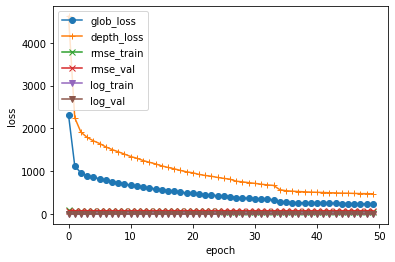

Minimum loss values achieved during training:
Global: 235.769 at epoch: 49


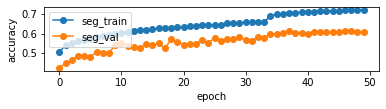

Best accuracy values achieved during training (on validation set):
Global pixel-wise classification: 0.615 achieved on epoch: 47


In [2]:
# while True:
#     data = input('[INPUT] Enter checkpoint path please: ')
#     model_path = data
#     break
model_path = "./checkpoints/experiment/sun/best_model.pth.tar"
# model_path = "./checkpoints/experiment/sun/model_checkpoint_10_22112019.pth.tar"
if os.path.isfile(model_path):
    print('[PROGRESS] Loading checkpoint: {}   '.format(model_path), end='', flush=True)
    checkpoint = torch.load(model_path)
    print('\r[INFO] Checkpoint loaded: {}'.format(model_path))
    
    use_class = model_path.lower().find('class') is not -1
    loss_plot_num = 1
    
    trained_epoch = checkpoint['epoch']
    best_val_acc = checkpoint['best_val_seg_acc']
    train_loss_history = checkpoint['train_loss_hist']
    val_seg_acc_history = checkpoint['val_seg_acc_hist']
    train_seg_acc_history = checkpoint['train_seg_acc_hist']
    train_depth_loss_history = checkpoint['train_depth_loss_hist']
    train_depth_rmse_history = checkpoint['train_depth_rmse_hist']        
    train_depth_log_history = checkpoint['train_depth_log_hist']
    val_depth_rmse_history = checkpoint['val_depth_rmse_hist']        
    val_depth_log_history = checkpoint['val_depth_log_hist']
    
    print(train_depth_rmse_history)
    
    if use_class:
        train_seg_loss_history = checkpoint['train_seg_loss_hist']
        train_class_loss_history = checkpoint['train_class_loss_hist']
        train_class_acc_history = checkpoint['train_class_acc_hist']
        val_class_acc_history = checkpoint['val_class_acc_hist']
        loss_plot_num = 3
else:   
    raise FileNotFoundError('No checkpoint found at {}'.format(model_path))

plt.subplot(loss_plot_num, 1, 1)
plt.plot(train_loss_history, '-o')
plt.plot(train_depth_loss_history, '-+')
plt.plot(train_depth_rmse_history, '-x')
plt.plot(val_depth_rmse_history, '-x')
plt.plot(train_depth_log_history, '-v')
plt.plot(val_depth_log_history, '-v')

if use_class:    
    plt.plot(train_seg_loss_history, 'o')
#     plt.plot(train_class_loss_history, 'o')
    plt.legend(['glob_loss', 'seg_loss', 'class_loss'], loc='upper left')
else:
    plt.legend(['glob_loss',  'depth_loss', 'rmse_train', 'rmse_val', 'log_train', 'log_val'], loc='upper left')
    
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

print('Minimum loss values achieved during training:')
print('Global: %.3f at epoch: %i' % (np.min(train_loss_history), np.argmin(train_loss_history)))
if use_class:
    print('Segmentation: %.3f at epoch: %i' % (np.min(train_seg_loss_history), np.argmin(train_seg_loss_history)))
    print('Classification: %.3f at epoch: %i \n' % (np.min(train_class_loss_history), np.argmin(train_class_loss_history)))

plt.subplot(3, 1, 2)
plt.plot(train_seg_acc_history, '-o')
plt.plot(val_seg_acc_history, '-o')


plt.legend(['seg_train', 'seg_val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Not used for SUNRGBD dataset
if use_class:
    plt.subplot(3, 1, 3)
    plt.plot(train_class_acc_history, '-o')
    plt.plot(val_class_acc_history, '-o')
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('class. accuracy')
    plt.show()

print('Best accuracy values achieved during training (on validation set):')
print('Global pixel-wise classification: %.3f achieved on epoch: %i' % (np.max(val_seg_acc_history), np.argmax(val_seg_acc_history)))
if use_class:
    print('Global scene classification: %.3f achieved on epoch: %i' % (np.max(val_class_acc_history), np.argmax(val_class_acc_history)))